In [2]:
# IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# **CONFIG BLOCK**

In [3]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING (Using Deeper Model Architecture)**

In [4]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# BUILD DEEPER VGG16 FROM SCRATCH 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Extra Block (256 filters)
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),
 
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763398680.434818      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1763398687.008139     130 service.cc:148] XLA service 0x7c7ef4002cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763398687.009018     130 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763398687.817313     130 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763398706.357785     130 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.4039 - loss: 1.0294

77/77 ━━━━━━━━━━━━━━━━━━━━ 60s 464ms/step - accuracy: 0.4055 - loss: 1.0277 - val_accuracy: 0.7382 - val_loss: 0.6362
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7542 - loss: 0.5971

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.7546 - loss: 0.5964 - val_accuracy: 0.8268 - val_loss: 0.4411
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8127 - loss: 0.4768

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.8129 - loss: 0.4765 - val_accuracy: 0.8562 - val_loss: 0.3477
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8706 - loss: 0.3541

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.8705 - loss: 0.3543 - val_accuracy: 0.8665 - val_loss: 0.3465
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8718 - loss: 0.3417

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 277ms/step - accuracy: 0.8718 - loss: 0.3417 - val_accuracy: 0.8717 - val_loss: 0.3373
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8784 - loss: 0.3237

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.8783 - loss: 0.3237 - val_accuracy: 0.9045 - val_loss: 0.2601
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.8771 - loss: 0.3291 - val_accuracy: 0.8941 - val_loss: 0.2629
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8951 - loss: 0.2526

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.8951 - loss: 0.2527 - val_accuracy: 0.9143 - val_loss: 0.2166
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - accuracy: 0.9120 - loss: 0.2367 - val_accuracy: 0.9091 - val_loss: 0.2429
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8777 - loss: 0.2847

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.8778 - loss: 0.2845 - val_accuracy: 0.9200 - val_loss: 0.2027
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9007 - loss: 0.2291

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.9008 - loss: 0.2291 - val_accuracy: 0.9367 - val_loss: 0.1823
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9342 - loss: 0.1889

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.9341 - loss: 0.1890 - val_accuracy: 0.9465 - val_loss: 0.1727
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.9277 - loss: 0.1985 - val_accuracy: 0.8671 - val_loss: 0.3073
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9062 - loss: 0.2386

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.9064 - loss: 0.2383 - val_accuracy: 0.9511 - val_loss: 0.1408
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9437 - loss: 0.1471

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - accuracy: 0.9437 - loss: 0.1472 - val_accuracy: 0.9609 - val_loss: 0.1234
Epoch 16/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9545 - loss: 0.1221

77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - accuracy: 0.9544 - loss: 0.1224 - val_accuracy: 0.9620 - val_loss: 0.1051
Epoch 17/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.9441 - loss: 0.1517 - val_accuracy: 0.9545 - val_loss: 0.1406
Epoch 18/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 244ms/step - accuracy: 0.9459 - loss: 0.1408 - val_accuracy: 0.9591 - val_loss: 0.1129
Epoch 19/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.9637 - loss: 0.0971 - val_accuracy: 0.9310 - val_loss: 0.1987


55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.8593 - loss: 0.3608

 Test Accuracy: 91.59%
 Test Loss: 0.2338
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.9389    0.8203    0.8756       562
         Normal     0.8547    0.9600    0.9043       625
Viral Pneumonia     0.9743    0.9636    0.9689       550

       accuracy                         0.9159      1737
      macro avg     0.9226    0.9146    0.9163      1737
   weighted avg     0.9198    0.9159    0.9155      1737



<Figure size 800x600 with 0 Axes>

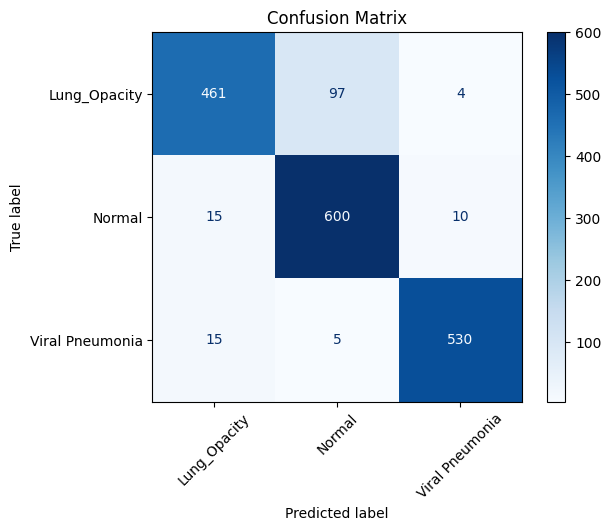

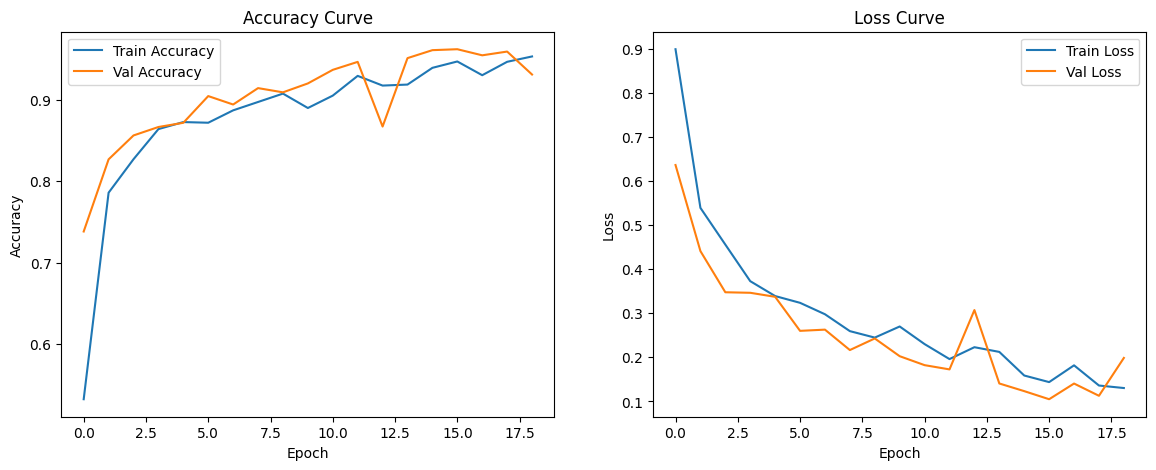

In [5]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **CONFIG BLOCK**

In [6]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING (Using Wider Model Architecture)**

In [8]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# BUILD WIDER VGG16 FROM SCRATCH 
model = Sequential([
    
    Conv2D(96, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(96, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(192, (3,3), activation='relu', padding='same'),
    Conv2D(192, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(384, (3,3), activation='relu', padding='same'),
    Conv2D(384, (3,3), activation='relu', padding='same'),
    Conv2D(384, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(640, (3,3), activation='relu', padding='same'),
    Conv2D(640, (3,3), activation='relu', padding='same'),
    Conv2D(640, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(640, (3,3), activation='relu', padding='same'),
    Conv2D(640, (3,3), activation='relu', padding='same'),
    Conv2D(640, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.
Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.4249 - loss: 1.0162

77/77 ━━━━━━━━━━━━━━━━━━━━ 58s 651ms/step - accuracy: 0.4266 - loss: 1.0143 - val_accuracy: 0.7618 - val_loss: 0.5706
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.7563 - loss: 0.5931

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 587ms/step - accuracy: 0.7567 - loss: 0.5924 - val_accuracy: 0.8297 - val_loss: 0.4544
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8137 - loss: 0.4948

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 584ms/step - accuracy: 0.8137 - loss: 0.4946 - val_accuracy: 0.8596 - val_loss: 0.3545
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8421 - loss: 0.4031

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 586ms/step - accuracy: 0.8421 - loss: 0.4029 - val_accuracy: 0.8746 - val_loss: 0.3164
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 493ms/step - accuracy: 0.8702 - loss: 0.3362 - val_accuracy: 0.8550 - val_loss: 0.3602
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8682 - loss: 0.3353

77/77 ━━━━━━━━━━━━━━━━━━━━ 44s 573ms/step - accuracy: 0.8683 - loss: 0.3353 - val_accuracy: 0.8867 - val_loss: 0.3170
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.8880 - loss: 0.2937

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 585ms/step - accuracy: 0.8880 - loss: 0.2936 - val_accuracy: 0.9056 - val_loss: 0.2419
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8920 - loss: 0.2757

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 584ms/step - accuracy: 0.8921 - loss: 0.2754 - val_accuracy: 0.9264 - val_loss: 0.2068
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 493ms/step - accuracy: 0.8579 - loss: 0.3715 - val_accuracy: 0.8976 - val_loss: 0.2503
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 504ms/step - accuracy: 0.8898 - loss: 0.2908 - val_accuracy: 0.9223 - val_loss: 0.2016
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 493ms/step - accuracy: 0.9202 - loss: 0.2183 - val_accuracy: 0.9246 - val_loss: 0.2066
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9175 - loss: 0.2145

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 585ms/step - accuracy: 0.9176 - loss: 0.2143 - val_accuracy: 0.9390 - val_loss: 0.1646
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9443 - loss: 0.1655

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 584ms/step - accuracy: 0.9442 - loss: 0.1657 - val_accuracy: 0.9488 - val_loss: 0.1399
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9424 - loss: 0.1406

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 583ms/step - accuracy: 0.9423 - loss: 0.1408 - val_accuracy: 0.9517 - val_loss: 0.1196
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 493ms/step - accuracy: 0.9509 - loss: 0.1299 - val_accuracy: 0.9338 - val_loss: 0.1606
Epoch 16/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9483 - loss: 0.1387

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 583ms/step - accuracy: 0.9483 - loss: 0.1386 - val_accuracy: 0.9712 - val_loss: 0.0861
Epoch 17/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 493ms/step - accuracy: 0.9713 - loss: 0.0800 - val_accuracy: 0.9649 - val_loss: 0.0946
Epoch 18/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9463 - loss: 0.1321

77/77 ━━━━━━━━━━━━━━━━━━━━ 45s 586ms/step - accuracy: 0.9463 - loss: 0.1322 - val_accuracy: 0.9741 - val_loss: 0.0714
Epoch 19/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 493ms/step - accuracy: 0.9615 - loss: 0.0854 - val_accuracy: 0.9407 - val_loss: 0.1470
Epoch 20/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 493ms/step - accuracy: 0.8980 - loss: 0.2686 - val_accuracy: 0.9505 - val_loss: 0.1184


54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8948 - loss: 0.2783

E0000 00:00:1763404539.159806     131 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763404539.403057     131 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.8956 - loss: 0.2766

 Test Accuracy: 91.94%
 Test Loss: 0.2309
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.8722    0.9110    0.8912       562
         Normal     0.9089    0.8944    0.9016       625
Viral Pneumonia     0.9832    0.9564    0.9696       550

       accuracy                         0.9194      1737
      macro avg     0.9215    0.9206    0.9208      1737
   weighted avg     0.9206    0.9194    0.9198      1737



<Figure size 800x600 with 0 Axes>

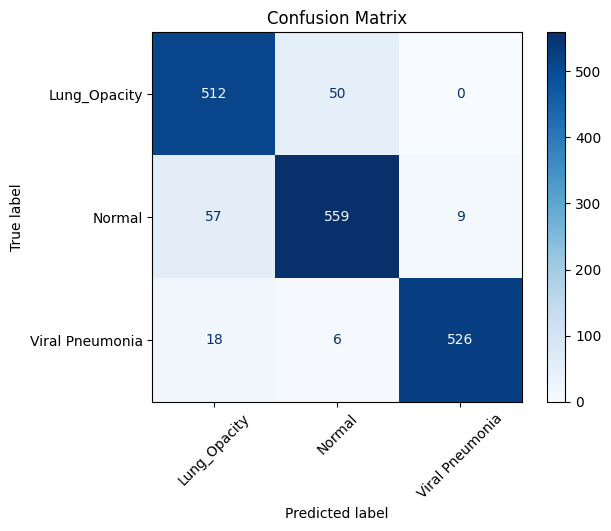

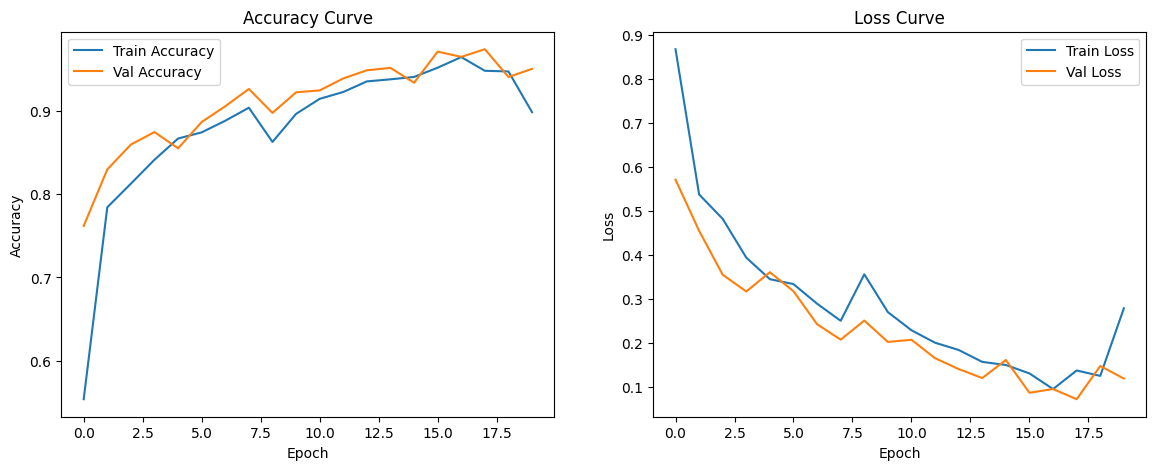

In [9]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()